In [2]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

from caveat.evaluate.describe import frequency
from caveat.evaluate.describe import transitions

In [3]:
def iter_models(path: Path):
    for dir in path.iterdir():
        name = dir.name
        if dir.is_dir():
            versions = sorted(
                [
                    d
                    for d in dir.iterdir()
                    if d.is_dir() and d.name.startswith("version")
                ]
            )
            yield name, versions[-1]

In [4]:
# find data
target_schedules = pd.read_csv("../tmp/nts_home_schedules.csv")
acts = list(target_schedules.act.value_counts(ascending=False).index)
class_map = {n: i for i, n in enumerate(acts)}

In [5]:
# batch_paths = {
#     "Discrete RNN (Baseline)": Path("../logs/paper_d_rnn"),
#     "Discrete CNN VAE": Path("../logs/paper_d_cnn_vae"),
#     "Continuous RNN VAE": Path("../logs/paper_c_rnn_vae"),
#     "Continuous RNN JVAE": Path("../logs/paper_c_rnn_Jvae"),
# }

# batch_path = Path("../logs/search_d_cnn_vae")
# schedules = {
#     n: pd.read_csv(p / "synthetic_schedules.csv")
#     for n, p in iter_models(batch_path)
# }
# fig = frequency.frequency_plots(target_schedules, schedules)
# fig = transitions.sequence_prob_plot(target_schedules, schedules)


# next(iter_models(batch_paths[0]))

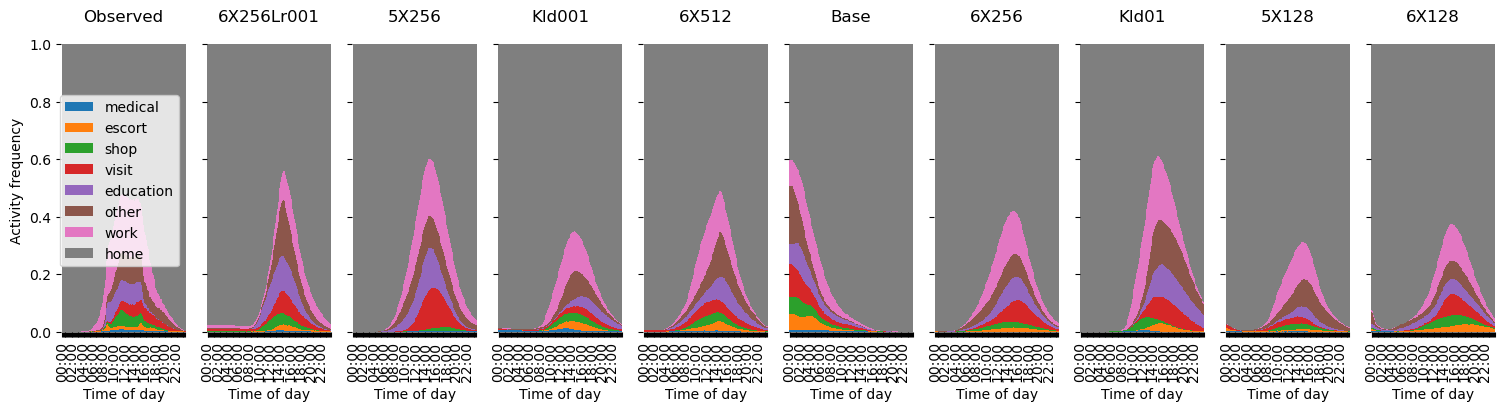

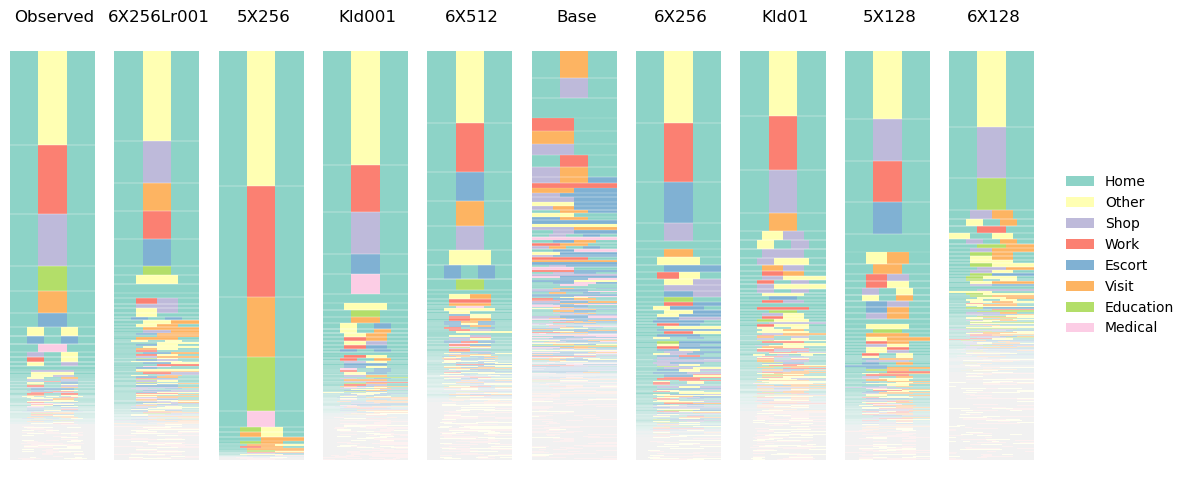

In [12]:
batch_path = Path("../logs/search_c_rnn_vae")
schedules = {
    n: pd.read_csv(p / "synthetic_schedules.csv")
    for n, p in iter_models(batch_path)
}
fig = frequency.frequency_plots(target_schedules, schedules)
fig = transitions.sequence_prob_plot(target_schedules, schedules)

In [61]:
def build_tables(batch_paths):
    distances = pd.DataFrame()
    descriptions = pd.DataFrame()

    for name, path in batch_paths.items():
        domains = pd.read_csv(path / "domain_distances.csv").set_index("domain")
        descriptions = pd.read_csv(path / "domain_descriptions.csv").set_index(
            "domain"
        )
        print(descriptions)

        means = domains["mean"]
        stds = domains["std"]

        distances[(name, "mean")] = means
        distances[(name, "std")] = stds
    distances = distances.T
    distances = distances.set_index(pd.MultiIndex.from_tuples(distances.index))
    distances = distances.unstack(level=-1)
    distances = distances.drop("creativity", axis=1)
    sample_quality = distances["sample quality"]
    density = distances[
        ["aggregate", "participations", "transitions", "timing"]
    ]

    # creativity

    sample_quality
    density


build_tables(batch_paths)

                observed  DiscLSTM1  DiscLSTM3  DiscLSTM4  DiscLSTM2  \
domain                                                                 
aggregate       0.688881   0.414210   0.420015   0.429571   0.417259   
creativity      0.774862   0.504128   0.504090   0.504065   0.504178   
participations  1.268212   3.319988   2.507772   2.230697   3.059285   
sample quality  1.000000   0.999950   0.999737   1.000000   1.000000   
timing          0.514249   0.434936   0.439874   0.458337   0.479436   
transitions     0.023494   0.072485   0.054322   0.047287   0.067435   

                DiscLSTM5      mean       std  
domain                                         
aggregate        0.390136  0.414238  0.014650  
creativity       0.504141  0.504120  0.000044  
participations   3.152285  2.854005  0.462774  
sample quality   0.999987  0.999935  0.000113  
timing           0.447635  0.452044  0.017679  
transitions      0.069046  0.062115  0.010776  
                observed  paper_d_cnn_n

KeyError: 'mean'

In [45]:
df.index

MultiIndex([('Discrete RNN (Baseline)', 'mean'),
            ('Discrete RNN (Baseline)',  'std'),
            (       'Discrete CNN VAE', 'mean'),
            (       'Discrete CNN VAE',  'std'),
            (     'Continuous RNN VAE', 'mean'),
            (     'Continuous RNN VAE',  'std'),
            (    'Continuous RNN JVAE', 'mean'),
            (    'Continuous RNN JVAE',  'std')],
           )

In [46]:
df.unstack(level=-1)

domain                  aggregate           creativity      participations  \
                             mean       std       mean  std           mean   
Continuous RNN JVAE      0.117006  0.008813   0.225138  0.0       1.599031   
Continuous RNN VAE       0.117006  0.008813   0.225138  0.0       1.599031   
Discrete CNN VAE         0.117006  0.008813   0.225138  0.0       1.599031   
Discrete RNN (Baseline)  0.117006  0.008813   0.225138  0.0       1.599031   

domain                            sample quality             timing            \
                              std           mean       std     mean       std   
Continuous RNN JVAE      0.457763       0.000065  0.000113  0.17383  0.017231   
Continuous RNN VAE       0.457763       0.000065  0.000113  0.17383  0.017231   
Discrete CNN VAE         0.457763       0.000065  0.000113  0.17383  0.017231   
Discrete RNN (Baseline)  0.457763       0.000065  0.000113  0.17383  0.017231   

domain                  transitions            
                               mean       std  
Continuous RNN JVAE        0.076307  0.010737  
Continuous RNN VAE         0.076307  0.010737  
Discrete CNN VAE           0.076307  0.010737  
Discrete RNN (Baseline)    0.076307  0.010737

In [ ]:
512

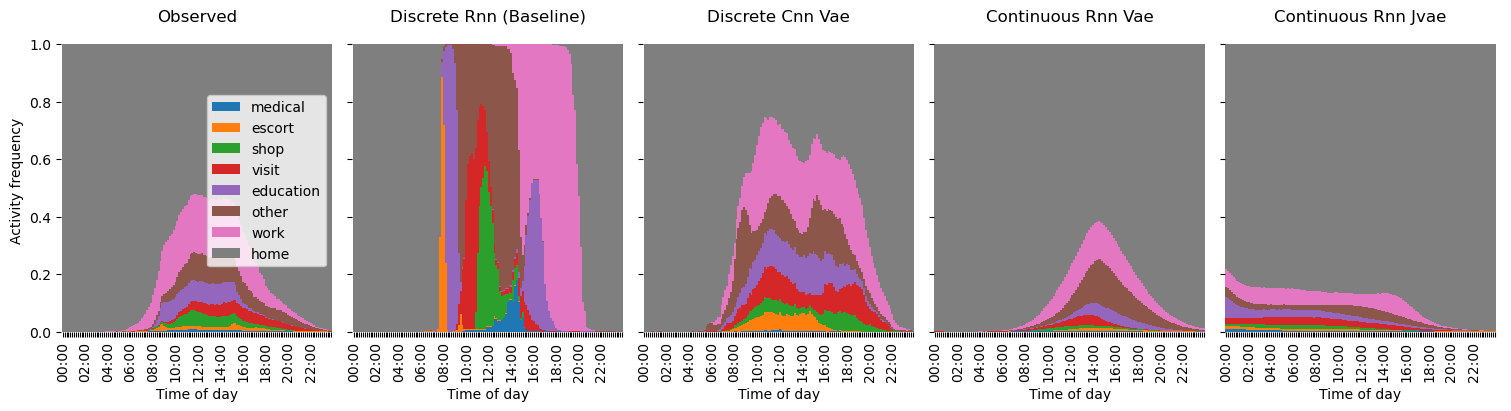

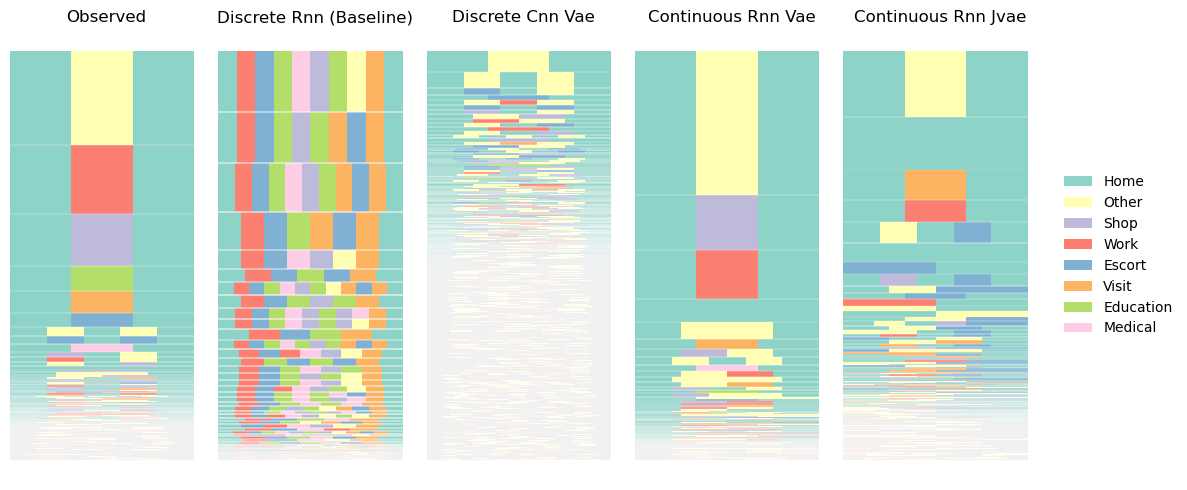

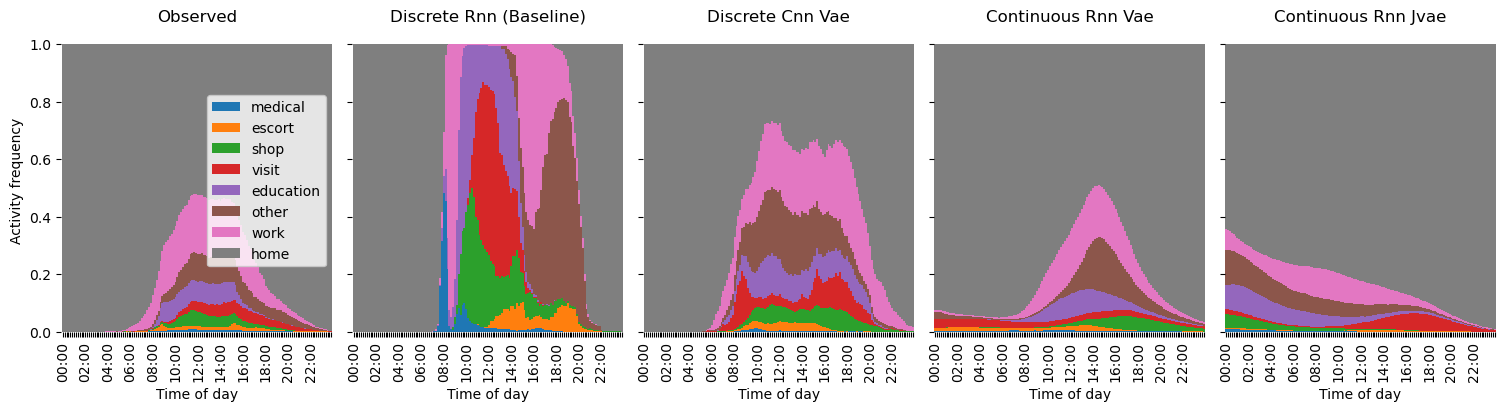

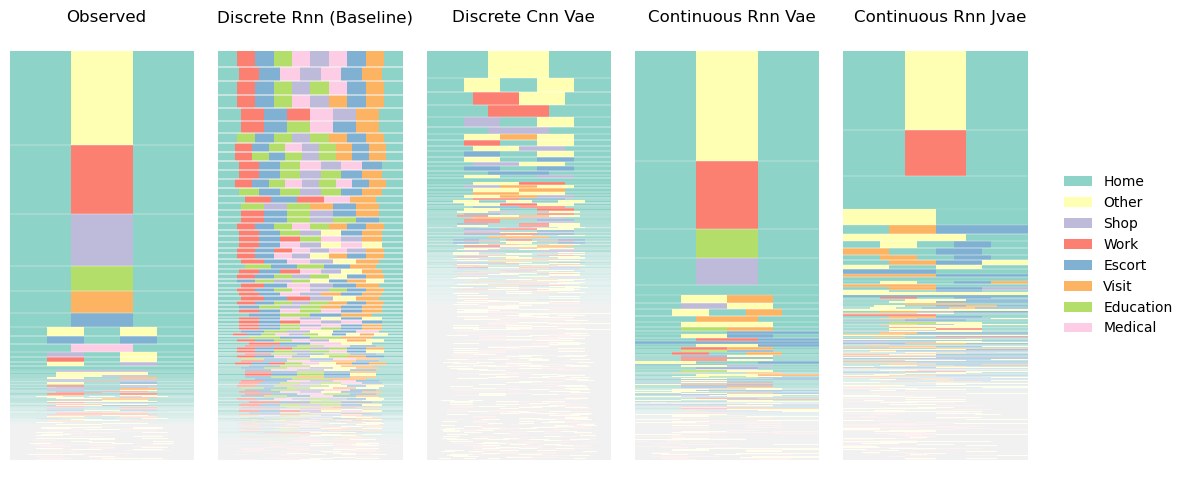

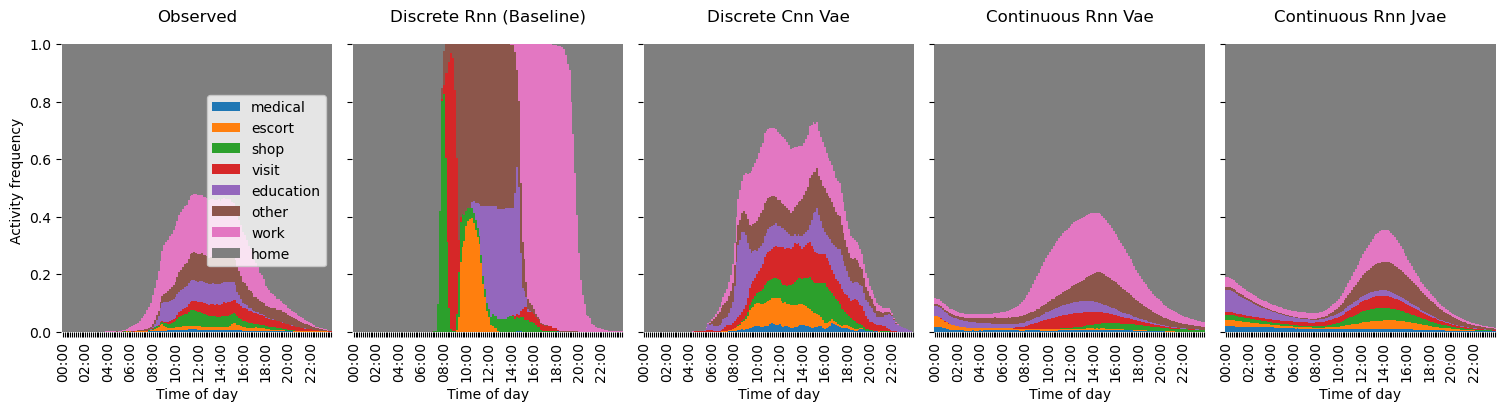

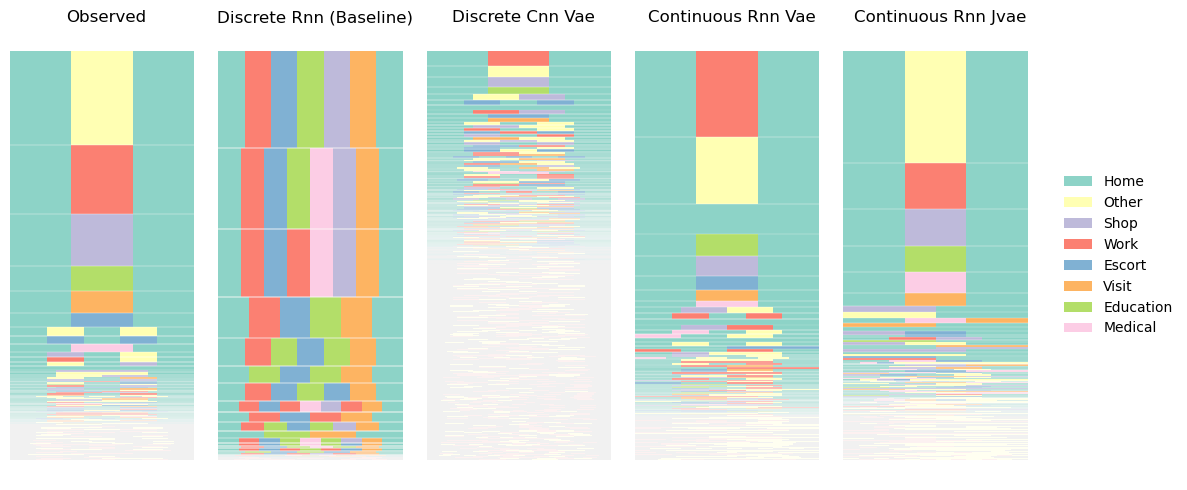

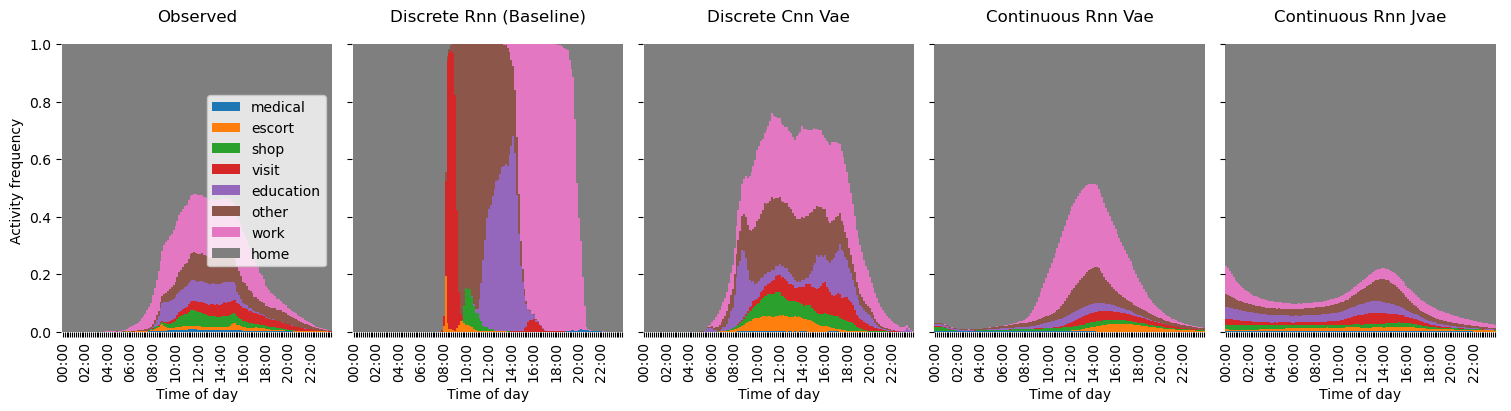

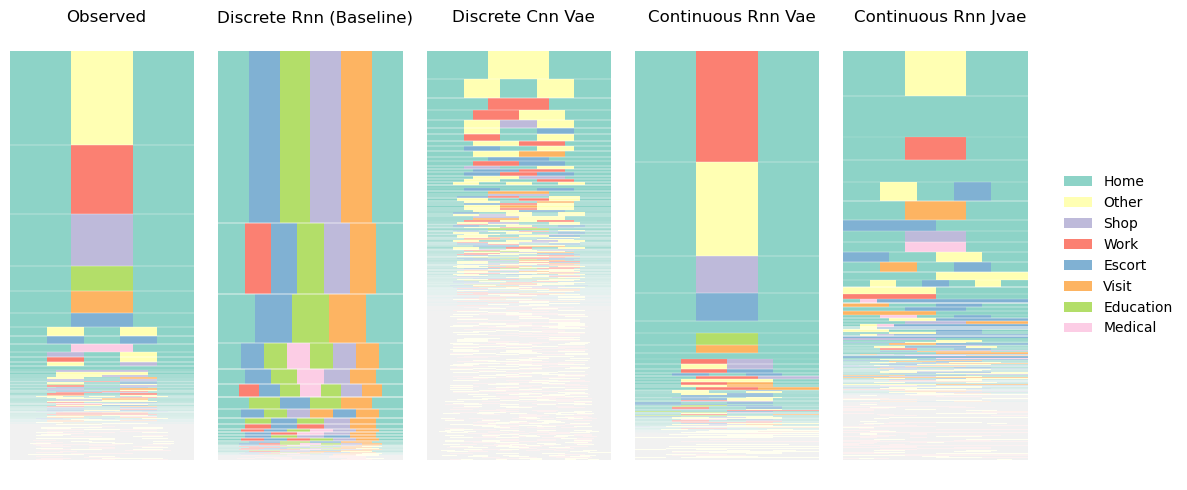

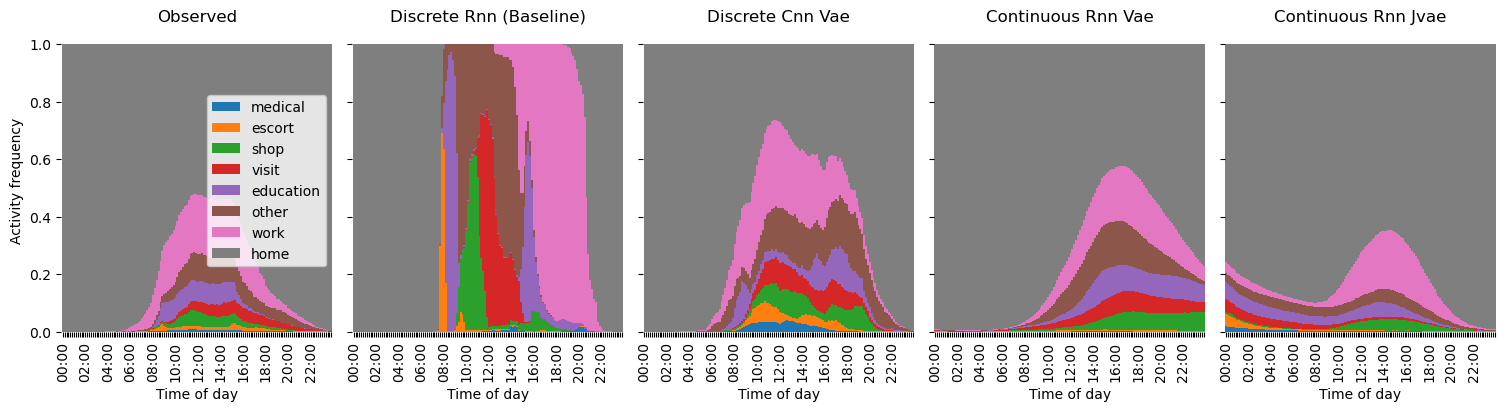

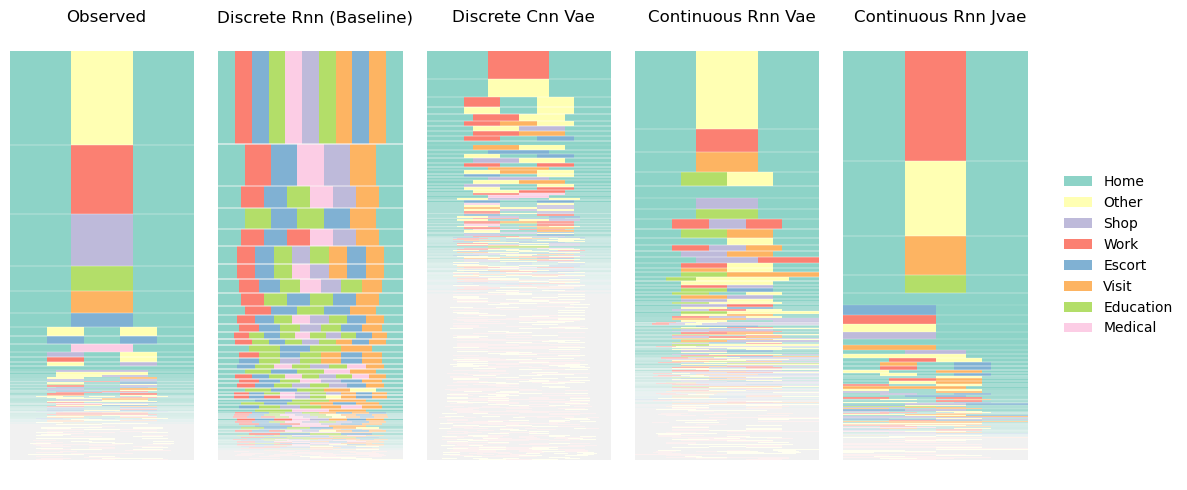

In [24]:
for i in range(5):
    schedules = {
        k: pd.read_csv(list(iter_models(v))[i] / "synthetic_schedules.csv")
        for k, v in batch_paths.items()
    }
    fig = frequency.frequency_plots(target_schedules, schedules)
    fig = transitions.sequence_prob_plot(target_schedules, schedules)

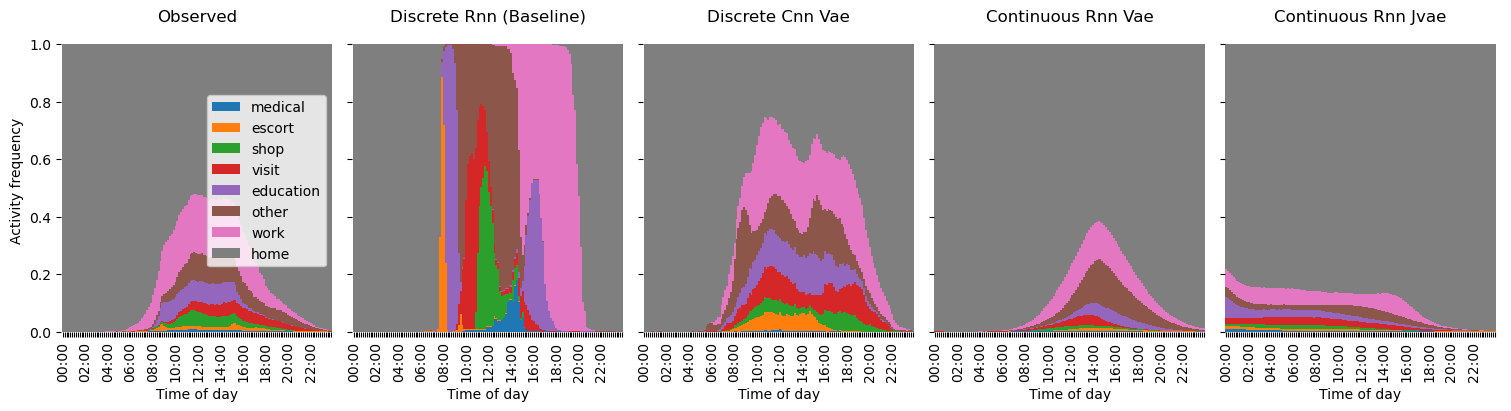

In [17]:
# freq plots
# fig, axs = plt.subplots(5, 1, figsize=(5, 12))
# frequency.plot_agg_acts("NTS", target_schedules, class_map, ax=axs[0])
schedules = {
    k: pd.read_csv(list(iter_models(v))[0] / "synthetic_schedules.csv")
    for k, v in batch_paths.items()
}
fig = frequency.frequency_plots(target_schedules, schedules)

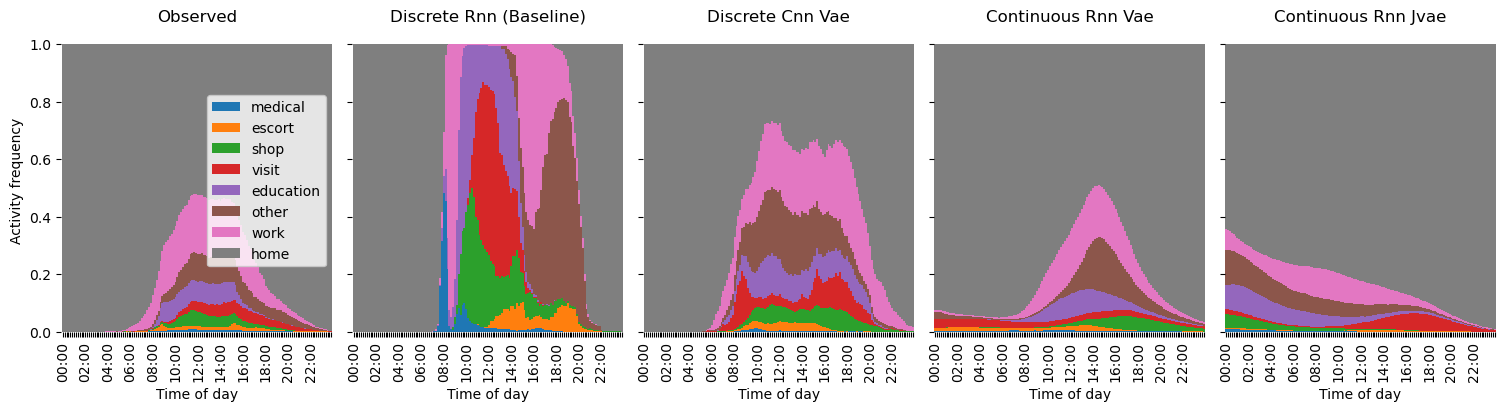

In [18]:
# freq plots
# fig, axs = plt.subplots(5, 1, figsize=(5, 12))
# frequency.plot_agg_acts("NTS", target_schedules, class_map, ax=axs[0])
schedules = {
    k: pd.read_csv(list(iter_models(v))[1] / "synthetic_schedules.csv")
    for k, v in batch_paths.items()
}
fig = frequency.frequency_plots(target_schedules, schedules)

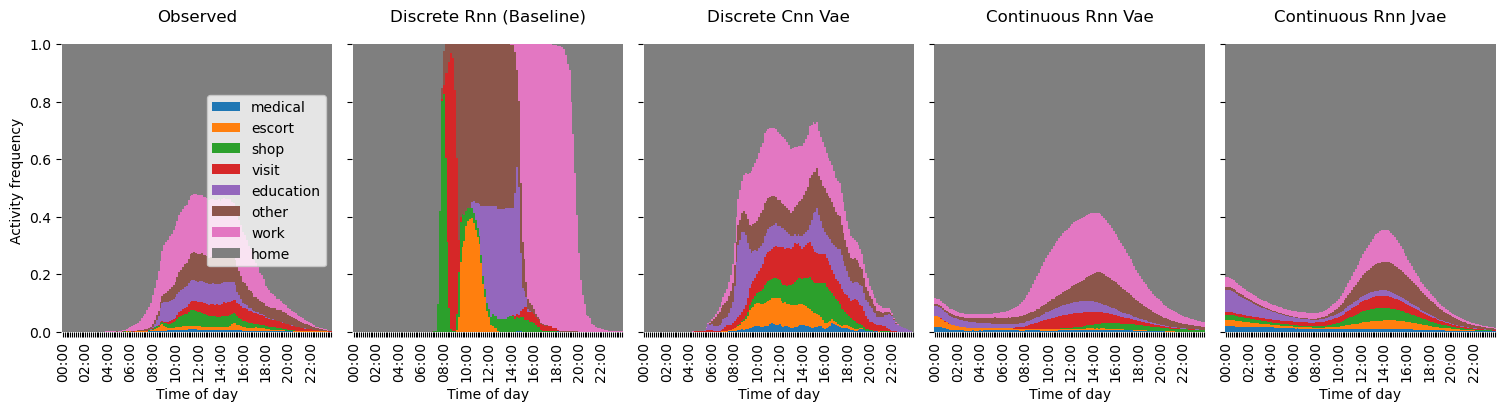

In [19]:
# freq plots
# fig, axs = plt.subplots(5, 1, figsize=(5, 12))
# frequency.plot_agg_acts("NTS", target_schedules, class_map, ax=axs[0])
schedules = {
    k: pd.read_csv(list(iter_models(v))[2] / "synthetic_schedules.csv")
    for k, v in batch_paths.items()
}
fig = frequency.frequency_plots(target_schedules, schedules)

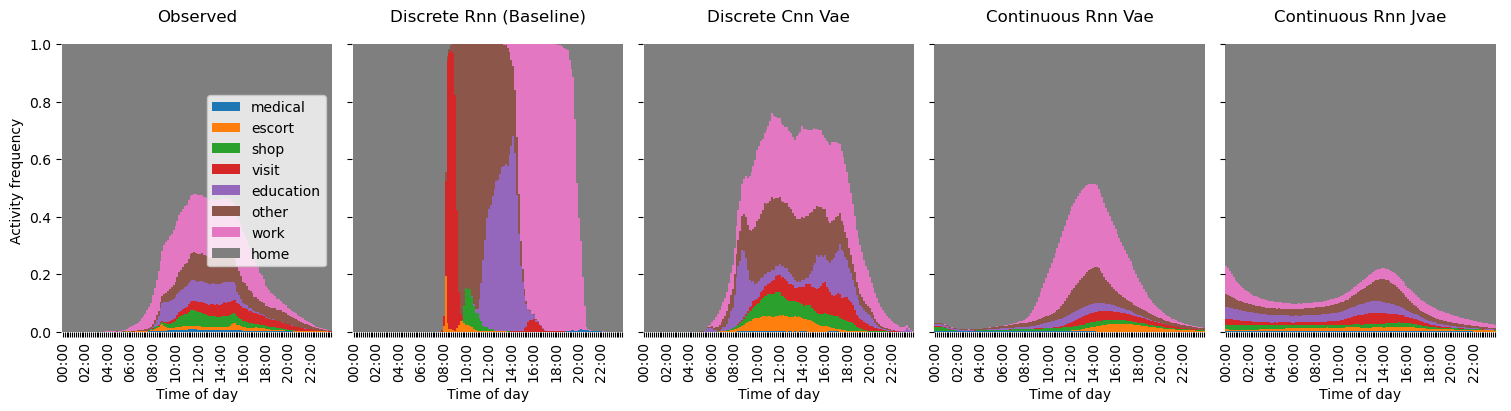

In [20]:
# freq plots
# fig, axs = plt.subplots(5, 1, figsize=(5, 12))
# frequency.plot_agg_acts("NTS", target_schedules, class_map, ax=axs[0])
schedules = {
    k: pd.read_csv(list(iter_models(v))[3] / "synthetic_schedules.csv")
    for k, v in batch_paths.items()
}
fig = frequency.frequency_plots(target_schedules, schedules)

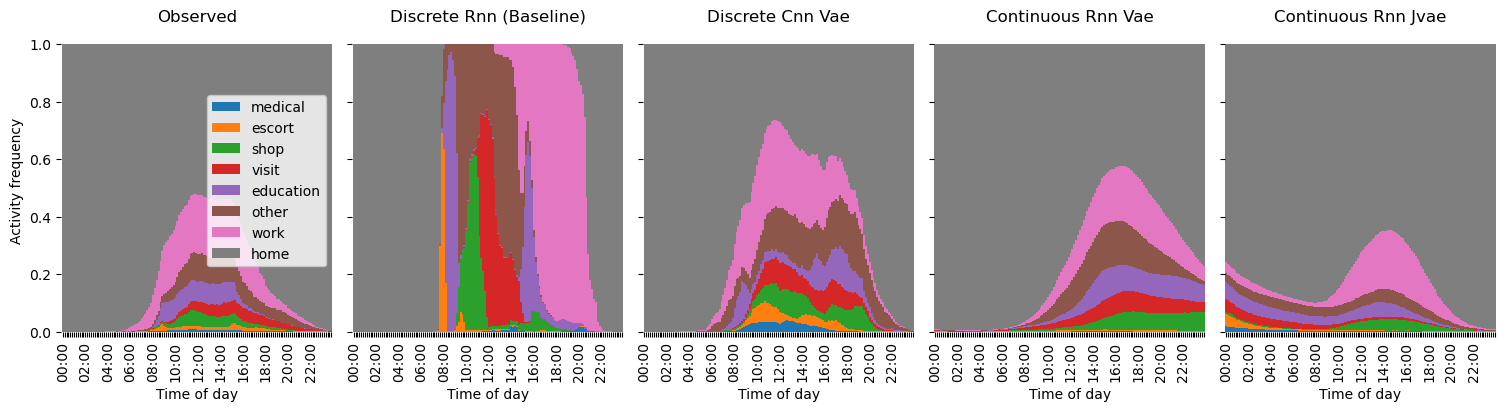

In [21]:
# freq plots
# fig, axs = plt.subplots(5, 1, figsize=(5, 12))
# frequency.plot_agg_acts("NTS", target_schedules, class_map, ax=axs[0])
schedules = {
    k: pd.read_csv(list(iter_models(v))[4] / "synthetic_schedules.csv")
    for k, v in batch_paths.items()
}
fig = frequency.frequency_plots(target_schedules, schedules)

In [3]:
distances_subs.set_index(["domain", "feature", "sub_pop"]).loc["timing"]

segment  feature count  observed  best_jm_z24  \
feature         sub_pop                                                     
start times     gender=M      home0        18319.0  0.000000     0.003086   
                gender=M      home1        18314.0  0.625418     0.028188   
                gender=M     other0         7210.0  0.532486     0.054715   
                gender=M      work0         4857.0  0.358418     0.075064   
                gender=M      shop0         3893.0  0.525128     0.047444   
...                             ...            ...       ...          ...   
start-durations income=4       shop         1987.0  0.592167     0.052715   
                income=4     escort         1605.0  0.574130     0.116118   
                income=4      visit          936.0  0.700732     0.068727   
                income=4  education          560.0  0.659356     0.154686   
                income=4    medical          260.0  0.572596     0.060665   

                         distance  
feature         sub_pop            
start times     gender=M      EMD  
                gender=M      EMD  
                gender=M      EMD  
                gender=M      EMD  
                gender=M      EMD  
...                           ...  
start-durations income=4      EMD  
                income=4      EMD  
                income=4      EMD  
                income=4      EMD  
                income=4      EMD  

[3218 rows x 5 columns]

In [4]:
from caveat.evaluate.distance.wasserstein import emd
from caveat.evaluate.features.frequency import activity_frequencies

In [5]:
sample = pd.read_csv("../logs/best_jm_z24/version_30/synthetic_schedules.csv")
target = pd.read_csv("../tmp/nts_home_schedules.csv")
sample.head()

,Unnamed: 0,pid,act,start,end,duration
0,0,0,home,0,675,675
1,1,0,education,675,857,182
2,2,0,home,857,1305,448
3,3,1,home,0,479,479
4,4,1,work,479,743,264


In [6]:
freqs = activity_frequencies(sample)
support, density = freqs["work"]
tsupport, tdensity = activity_frequencies(target)["work"]
emd((support, density), (tsupport, tdensity))

0.03128210155028198

In [7]:
from caveat.evaluate.describe.features import (
    average,
    average_weight,
    feature_weight,
    average_density,
)

In [8]:
average_density(freqs)

home         0.856425
education    0.016305
work         0.065564
shop         0.018199
other        0.022943
visit        0.015936
medical      0.000595
escort       0.004035
dtype: float64

In [9]:
tdensity

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
       3.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
       4.000e+00, 9.000e+00, 9.000e+00, 9.000e+00, 1.600e+01, 2.300e+01,
       3.700e+01, 5.300e+01, 1.030e+02, 1.460e+02, 2.120e+02, 3.320e+02,
       6.000e+02, 6.870e+02, 8.420e+02, 1.094e+03, 1.548e+03, 1.871e+03,
       2.454e+03, 2.942e+03, 3.758e+03, 4.353e+03, 5.106e+03, 5.619e+03,
       6.425e+03, 6.652e+03, 6.901e+03, 7.063e+03, 7.284e+03, 7.356e+03,
       7.454e+03, 7.500e+03, 7.552e+03, 7.570e+03, 7.571e+03, 7.614e+03,
       7.654e+03, 7.599e+03, 7.553e+03, 7.546e+03, 7.566e+03, 7.519e+03,
       7.497e+03, 7.497e+03, 7.479e+03, 7.359e+03, 7.221e+03, 7.138e+03,
       7.040e+03, 6.881e+03, 6.691e+03, 6.552e+03, 6.385e+03, 6.078e+03,
       5.599e+03, 5.218e+03, 4.721e+03, 4.212e+03, 3.627e+03, 3.181e+03,
       2.589e+03, 2.274e+03, 1.874e+03, 1.678e+03, 1.416e+03, 1.295e+03,
       1.138e+03, 1.049e+03, 9.320e+02, 8.310e+02, 

In [10]:
import numpy as np

In [11]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [2]:
attributes = pd.read_csv("../tmp/nts_home_attributes.csv")
attributes.head()

,pid,age,gender,ethnicity,education,license,car_access,work_status,area,income,hh_size,hh_composition,hh_children,hh_cars,hh_bikes,hh_motorcycles
0,0,50,M,white,N,yes,yes,unemployed,urban,1,1,1adult,0,1.0,0,0.0
1,1,50,M,white,N,yes,yes,unemployed,urban,1,1,1adult,0,1.0,0,0.0
2,2,50,M,white,N,yes,yes,unemployed,urban,1,1,1adult,0,1.0,0,0.0
3,3,50,M,white,N,yes,yes,unemployed,urban,1,1,1adult,0,1.0,0,0.0
4,4,50,M,white,N,yes,yes,unemployed,urban,1,1,1adult,0,1.0,0,0.0


In [3]:
age_mapping = {
    1: 0,
    2: 1,
    3: 3,
    4: 5,
    5: 11,
    6: 16,
    7: 17,
    8: 18,
    9: 19,
    10: 20,
    11: 21,
    12: 26,
    13: 30,
    14: 40,
    15: 50,
    16: 60,
    17: 65,
    18: 70,
    19: 75,
    20: 80,
    21: 85,
}
age_to_idx = {v: k for k, v in age_mapping.items()}
age_group_mapping = {
    1: "<5",
    2: "<5",
    3: "<5",
    4: "5-11",
    5: "11-16",
    6: "16-20",
    7: "16-20",
    8: "16-20",
    9: "16-20",
    10: "20-30",
    11: "20-30",
    12: "20-30",
    13: "30-40",
    14: "40-50",
    15: "50-70",
    16: "50-70",
    17: "50-70",
    18: "70+",
    19: "70+",
    20: "70+",
    21: "70+",
}

attributes["age_group"] = attributes.age.map(age_to_idx).map(age_group_mapping)
attributes.head()
attributes.to_csv("../tmp/nts_home_attributes_groups.csv", index="pid")